<a href="https://colab.research.google.com/github/sidharthh-a/polynomial-curve-fitting/blob/main/PolynomialCurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load necessary libraries and the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

Nonlinear dataset

In [ ]:
np.random.seed(42)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
Y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])


Add a few outliers

In [ ]:
Y[::10] += 3 * (0.5 - np.random.rand(10))

Scatter plot

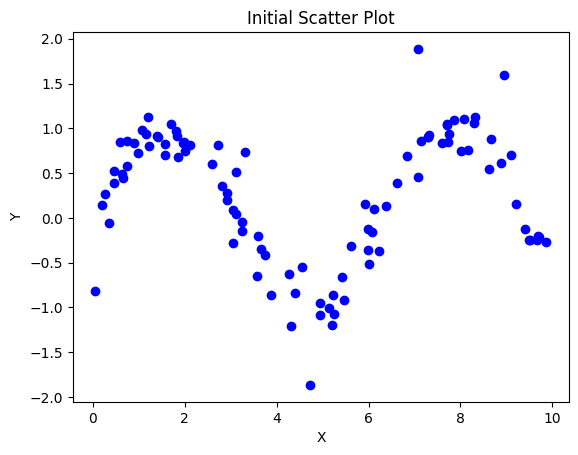

In [ ]:
plt.scatter(X, Y, color='blue')
plt.title("Initial Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Fit Polynomial Models (Degrees 1, 2, 3)

In [ ]:
def plot_polynomial_fit(X, Y, degree):
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X, Y)
  Y_pred = model.predict(X)
  plt.scatter(X, Y, color='blue', label='Data')
  plt.plot(X, Y_pred, color='red', label=f'Degree {degree} Fit')
  plt.title(f'Polynomial Regression (Degree {degree})')
  plt.legend()
  plt.show()
  return model, Y_pred

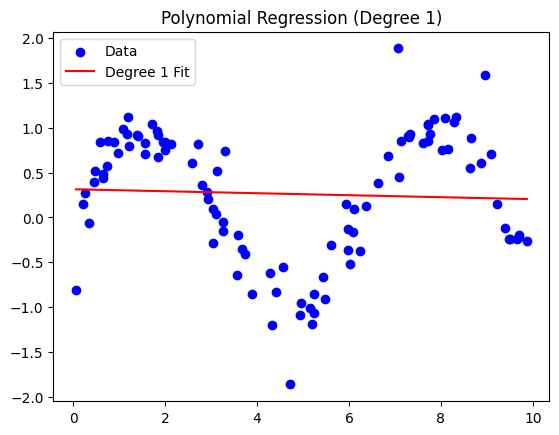

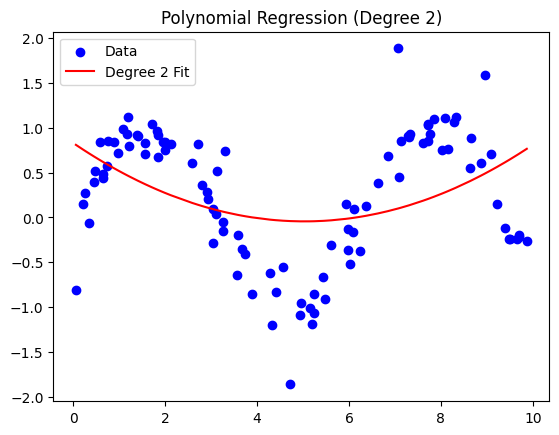

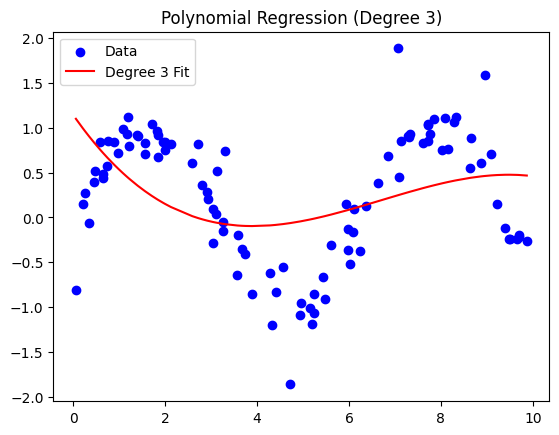

In [ ]:
model1, pred1 = plot_polynomial_fit(X, Y, 1)
model2, pred2 = plot_polynomial_fit(X, Y, 2)
model3, pred3 = plot_polynomial_fit(X, Y, 3)

Residual Analysis


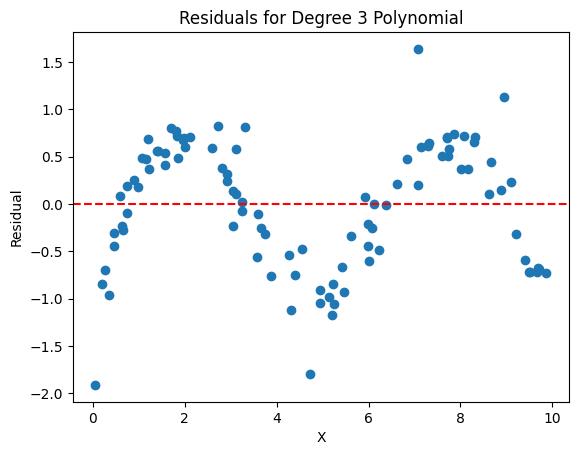

In [ ]:
residuals = Y - pred3
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals for Degree 3 Polynomial')
plt.xlabel('X')
plt.ylabel('Residual')
plt.show()

Outlier Detection and Refit


Outlier indices: [ 0  1  3 21 22 30 40 45 47 48 50 51 52 53 54 55 56 58 70 90]


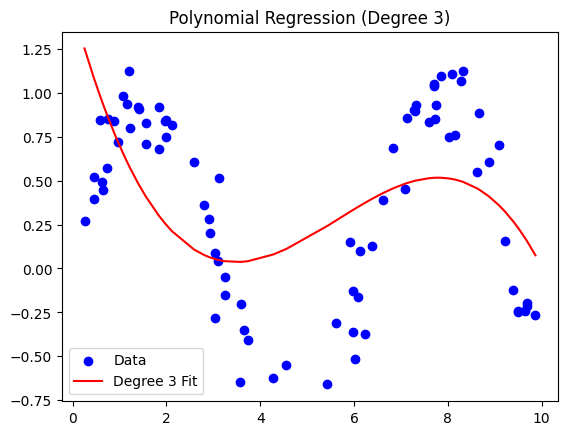

In [ ]:
threshold = 0.75 # Can adjust based on std deviation
outliers = np.where(np.abs(residuals) > threshold)[0]
print("Outlier indices:", outliers)
# Remove outliers
X_clean = np.delete(X, outliers, axis=0)
Y_clean = np.delete(Y, outliers)
# Refit model after outlier removal
model_clean, pred_clean = plot_polynomial_fit(X_clean, Y_clean, 3)

Robust Regression Approach (Without Removing Outliers)


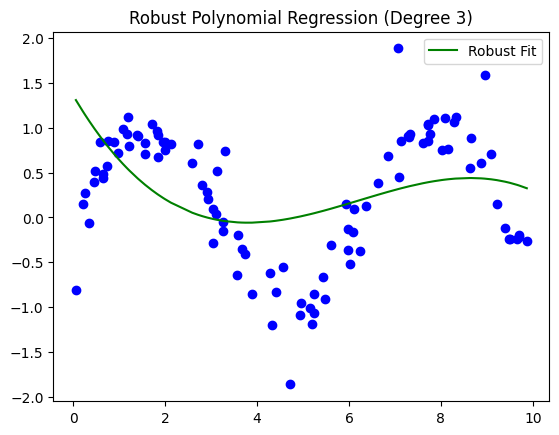

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
# Transform data
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
# Fit robust regression
huber = HuberRegressor()
huber.fit(X_scaled, Y)
Y_robust_pred = huber.predict(X_scaled)
# Plot
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_robust_pred, color='green', label='Robust Fit')
plt.title('Robust Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

Model Evaluation


In [ ]:
mse_original = mean_squared_error(Y, pred3)
mse_clean = mean_squared_error(Y_clean, pred_clean)
mse_robust = mean_squared_error(Y, Y_robust_pred)
print("MSE (Original):", mse_original)
print("MSE (Outliers Removed):", mse_clean)
print("MSE (Robust Regression):", mse_robust)

MSE (Original): 0.4346998276992297
MSE (Outliers Removed): 0.20246319988875028
MSE (Robust Regression): 0.44122946416531134


1. Best Initial Fit: The degree 3 polynomial model offered the best fit initially, capturing the non-linear oscillations present in the dataset.
2. Effect of Outliers: Outliers significantly distorted the curve, especially at extreme values, leading to higher error in predictions. The fit was more erratic and less smooth.
3. Outlier Handling Effectiveness: Removing outliers improved performance and curve stability.However, robust regression offered similar accuracy while retaining all data points, which is beneficial for real-world scenarios.
4. Recommended Model: The robust regression model with polynomial degree 3 is recommended. It maintains performance while avoiding data loss and is more generalizable